In [31]:
from google.colab import files
uploaded = files.upload()



Saving Sample_-_Superstore[1].csv to Sample_-_Superstore[1] (2).csv


🔍 Column Names:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

🧾 Data Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

🧼 Null Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer 

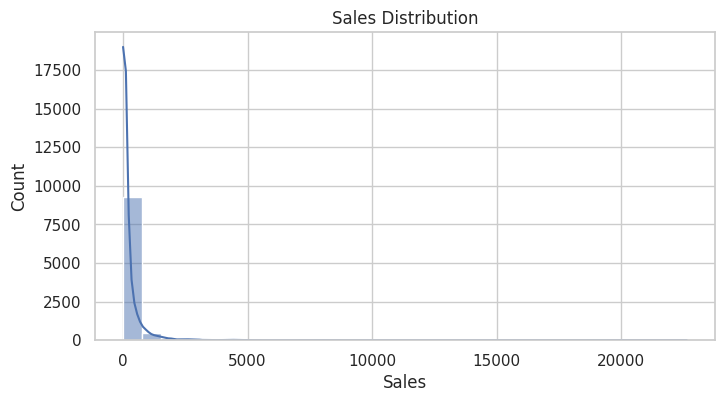

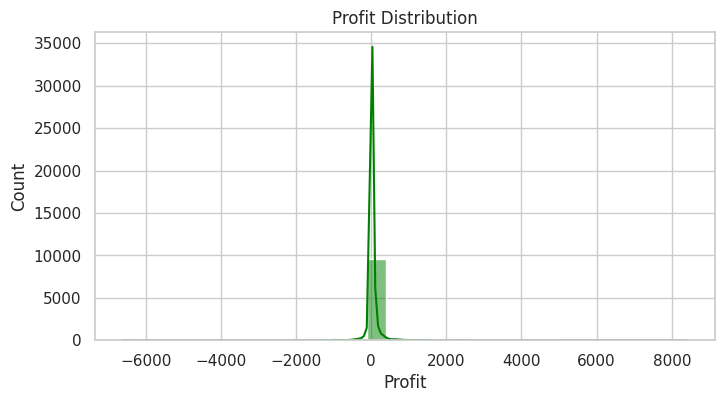

/tmp/ipython-input-32-1229296585.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quantity', data=df, palette='viridis')


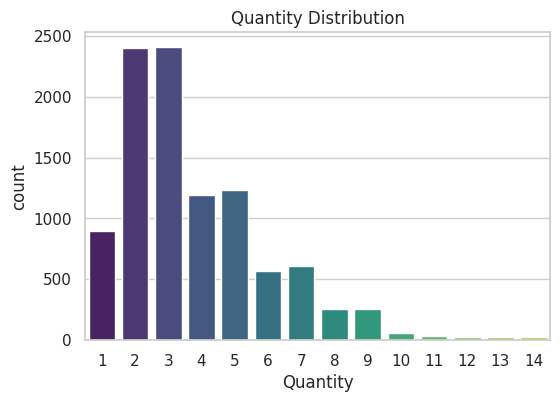

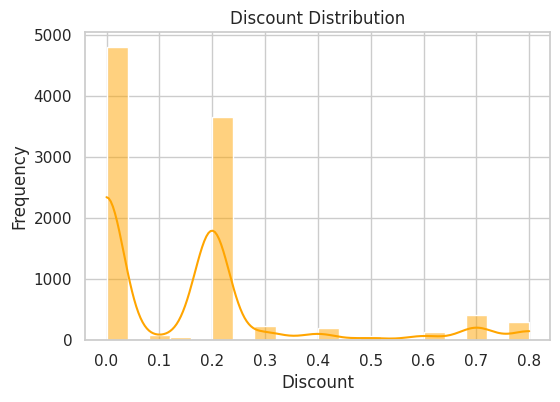

In [32]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("Sample_-_Superstore[1].csv", encoding='ISO-8859-1')


print("🔍 Column Names:")
print(df.columns)

print("\n🧾 Data Types:")
print(df.dtypes)

print("\n🧼 Null Values:")
print(df.isnull().sum())

df.drop(columns='Row ID',inplace=True)
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
print("Clean Data Info")
df.info()

#visualizing:
sns.set(style='whitegrid')
# Sales Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

# Profit Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Profit'], bins=30, kde=True, color='green')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()

# Quantity Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Quantity', data=df, palette='viridis')
plt.title('Quantity Distribution')
plt.show()

# Discount Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Discount'], bins=20, kde=True, color='orange')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

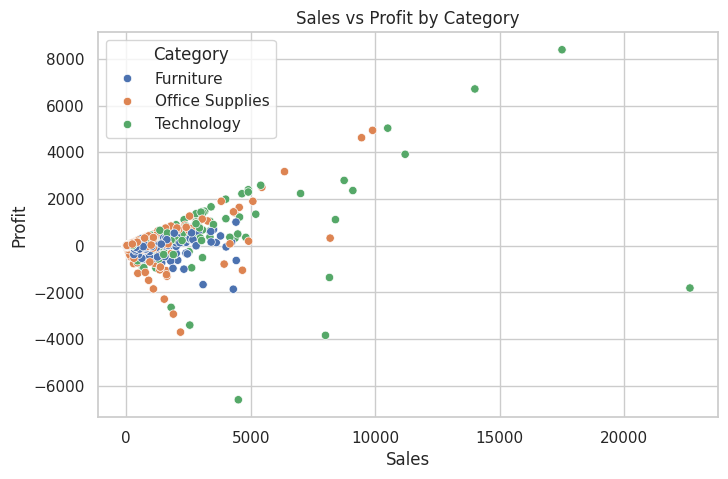

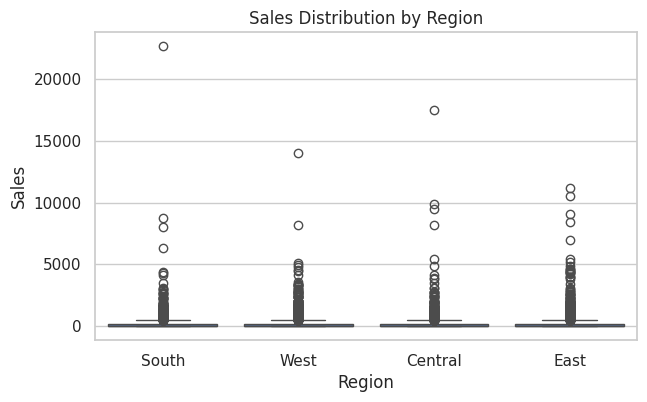

/tmp/ipython-input-33-550767216.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Profit', data=df, palette='Set2')


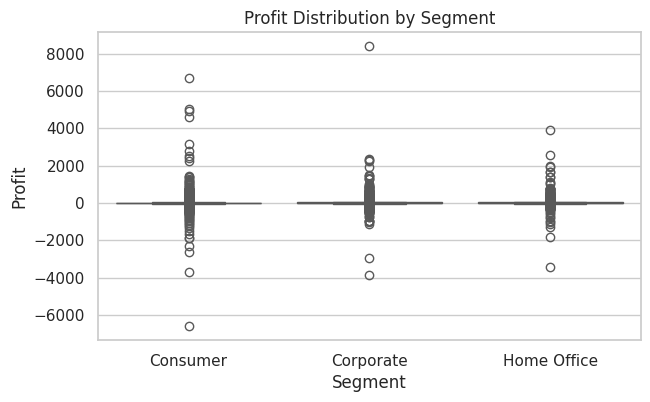

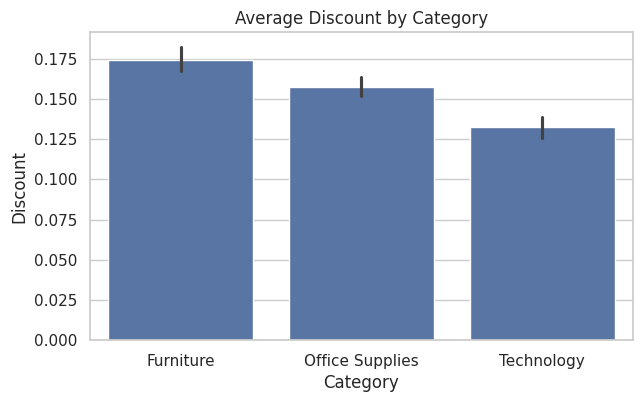

In [33]:
# Sales vs Profit
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Sales by Region
plt.figure(figsize=(7,4))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales Distribution by Region')
plt.show()

# Profit by Segment
plt.figure(figsize=(7,4))
sns.boxplot(x='Segment', y='Profit', data=df, palette='Set2')
plt.title('Profit Distribution by Segment')
plt.show()

# Average Discount by Category
plt.figure(figsize=(7,4))
sns.barplot(x='Category', y='Discount', data=df)
plt.title('Average Discount by Category')
plt.show()


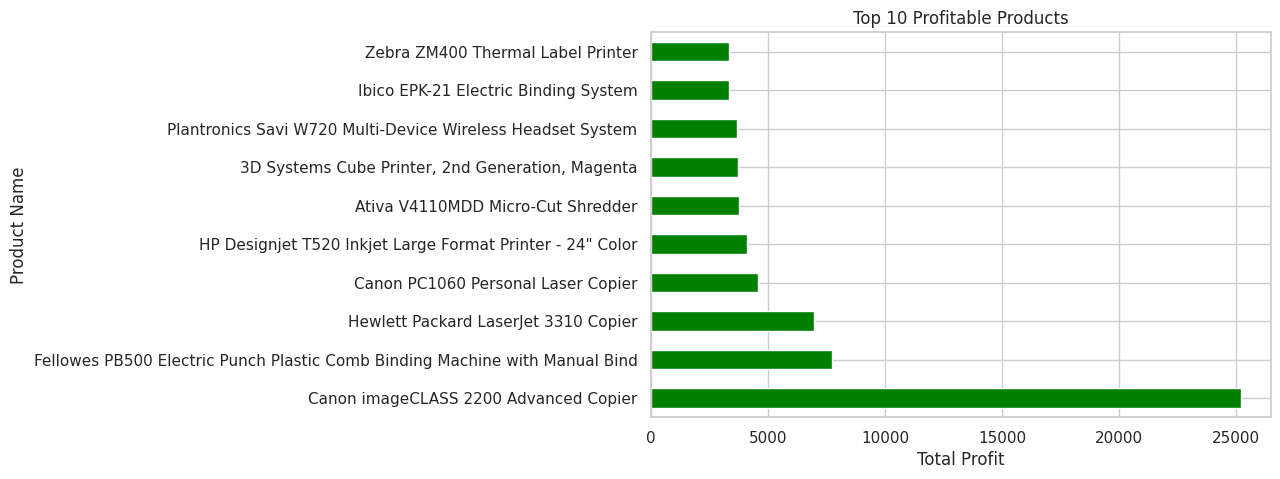

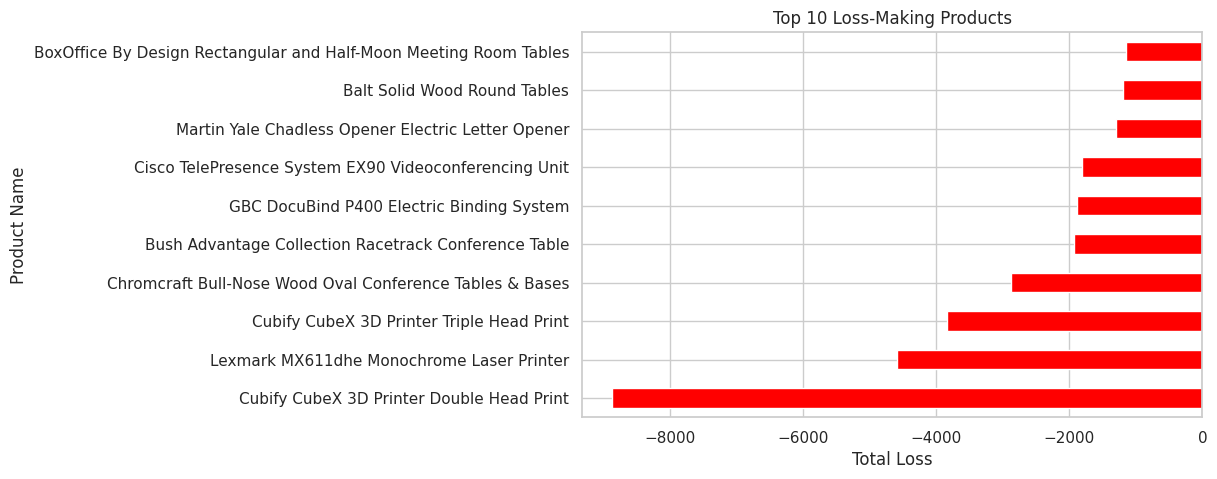

/tmp/ipython-input-34-2292371691.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_profit.index, y=subcategory_profit.values, palette='coolwarm')


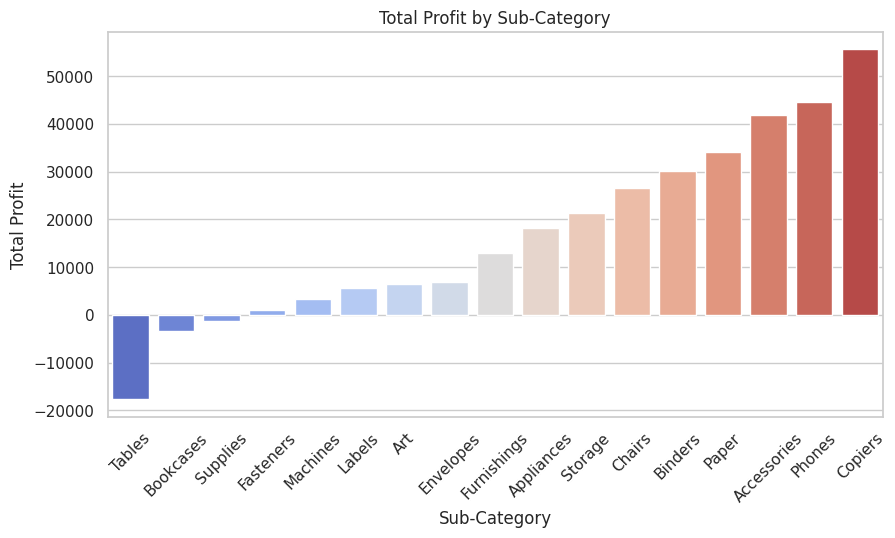

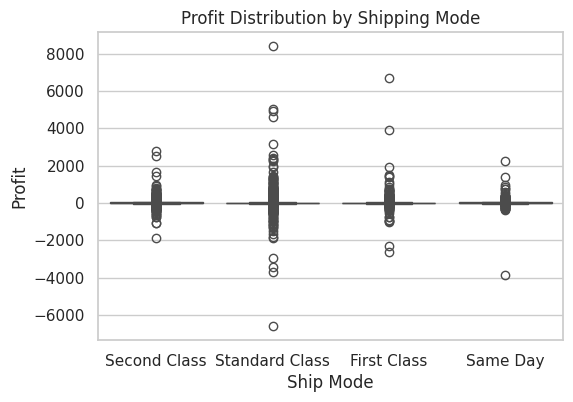

In [34]:
# Top 10 Profitable Products
top_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_profit.plot(kind='barh', figsize=(8,5), color='green')
plt.title('Top 10 Profitable Products')
plt.xlabel('Total Profit')
plt.show()

# Bottom 10 Products (Losses)
loss_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
loss_products.plot(kind='barh', figsize=(8,5), color='red')
plt.title('Top 10 Loss-Making Products')
plt.xlabel('Total Loss')
plt.show()

# Sub-Category Profit Overview
plt.figure(figsize=(10,5))
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sns.barplot(x=subcategory_profit.index, y=subcategory_profit.values, palette='coolwarm')
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=45)
plt.ylabel('Total Profit')
plt.show()

# Shipping Mode Profit
plt.figure(figsize=(6,4))
sns.boxplot(x='Ship Mode', y='Profit', data=df)
plt.title('Profit Distribution by Shipping Mode')
plt.show()


In [35]:
# 🧾 Final Business Insights

# 🔹 **Copiers** are the most profitable sub-category — high margins, worth focusing marketing and sales efforts.

# 🔹 **Tables** regularly result in losses — should be reviewed for high shipping cost, discounts, or return rate.

# 🔹 **Standard Class shipping** is associated with lower profits — explore shifting more to First Class or improving logistics.

# 🔹 **Consumer segment in the South region** shows the highest profitability — expand campaigns or discounts here for more gain.

# 🔹 Certain products like **Cubify CubeX 3D Printer** should be flagged for review or discontinuation due to recurring losses.

# ---

# ✅ Conclusion

# The Superstore data reveals crucial insights into what drives profit and where the business is losing money. By optimizing product lines, refining shipping methods, and focusing on high-performing regions and segments, the company can significantly boost its profitability.


/tmp/ipython-input-36-1249710110.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Region', y='Sales', data=df, palette='Blues')
/tmp/ipython-input-36-1249710110.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x='Region', y='Profit', data=df, palette='Greens')
/tmp/ipython-input-36-1249710110.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 2], x='Category', y='Profit', data=category_profit, palette='Set2')
/tmp/ipython-input-36-1249710110.py:26: FutureWarning: 

Passing `palette` witho

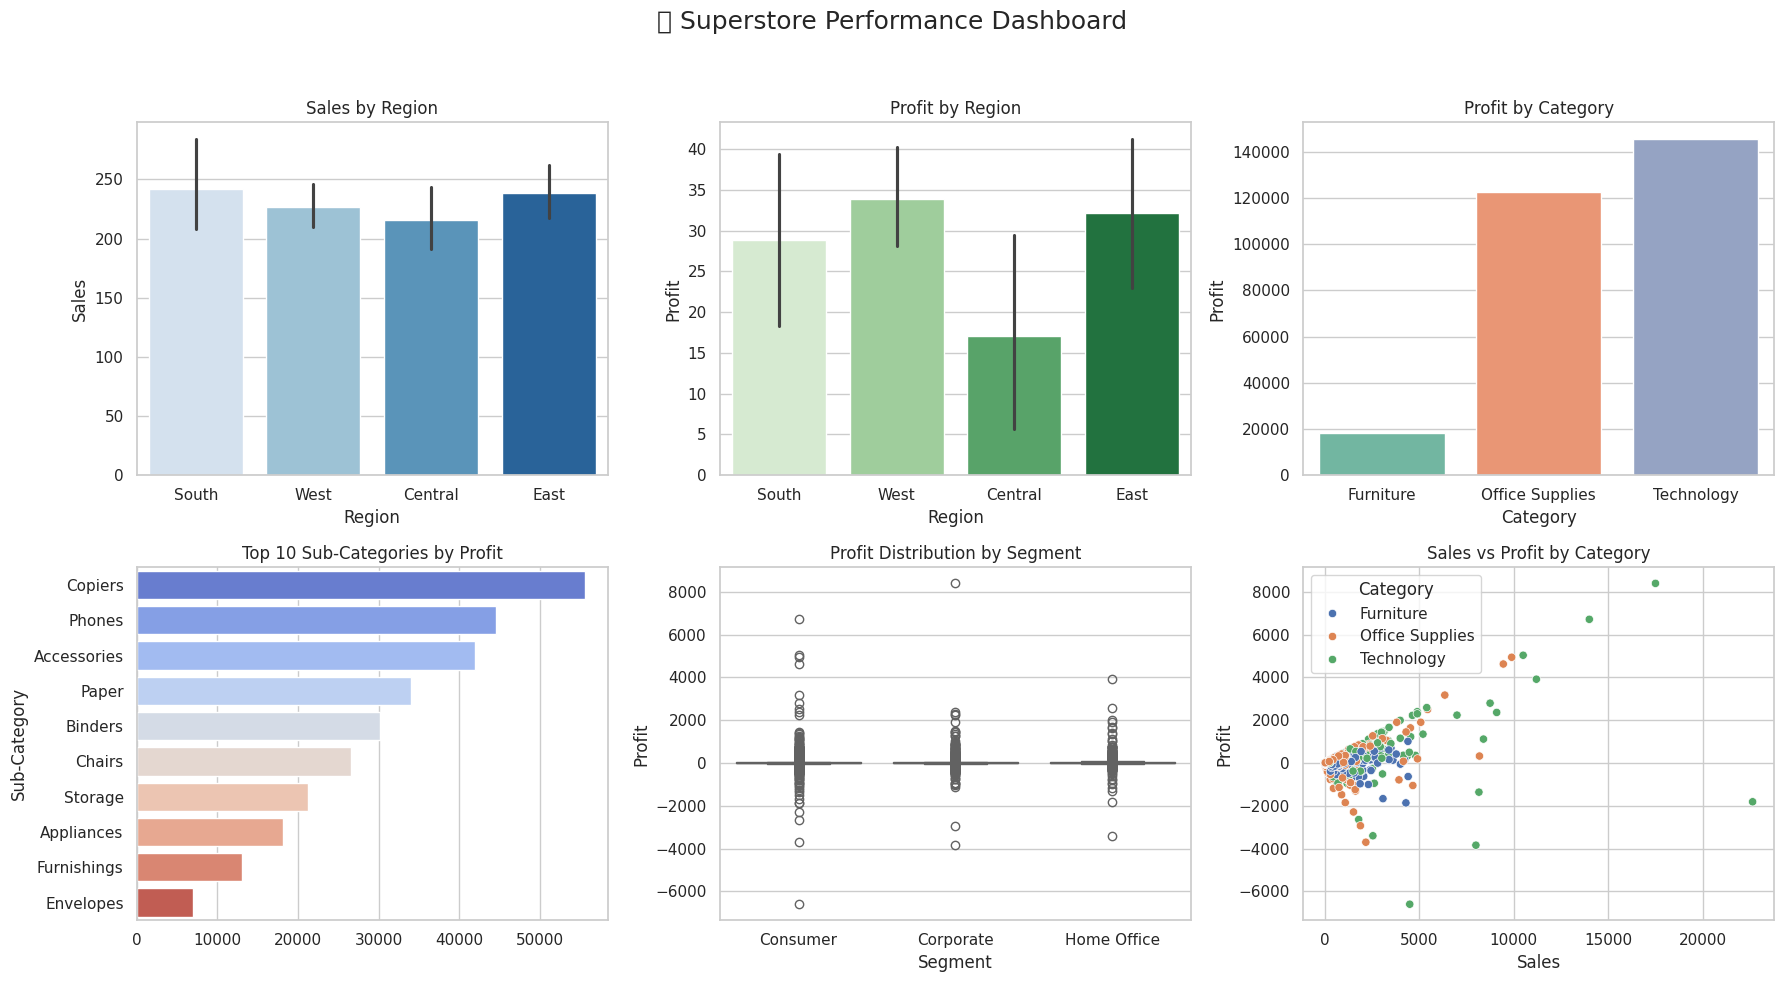

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall style
sns.set(style="whitegrid")

# Create a 2x3 dashboard layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("📊 Superstore Performance Dashboard", fontsize=18)

# 1. Sales by Region
sns.barplot(ax=axes[0, 0], x='Region', y='Sales', data=df, palette='Blues')
axes[0, 0].set_title("Sales by Region")

# 2. Profit by Region
sns.barplot(ax=axes[0, 1], x='Region', y='Profit', data=df, palette='Greens')
axes[0, 1].set_title("Profit by Region")

# 3. Profit by Category
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
sns.barplot(ax=axes[0, 2], x='Category', y='Profit', data=category_profit, palette='Set2')
axes[0, 2].set_title("Profit by Category")

# 4. Profit by Sub-Category (Top 10)
sub_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
sns.barplot(ax=axes[1, 0], x=sub_profit.values, y=sub_profit.index, palette='coolwarm', orient='h')
axes[1, 0].set_title("Top 10 Sub-Categories by Profit")

# 5. Profit by Segment
sns.boxplot(ax=axes[1, 1], x='Segment', y='Profit', data=df, palette='Accent')
axes[1, 1].set_title("Profit Distribution by Segment")

# 6. Sales vs Profit Scatter
sns.scatterplot(ax=axes[1, 2], x='Sales', y='Profit', data=df, hue='Category')
axes[1, 2].set_title("Sales vs Profit by Category")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [37]:
## 📌 Author

# **Karan Singh gaur**
# *Data Analysis Project using Python (Pandas, Seaborn, Matplotlib)*
